In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Jharkhand.xlsx')

In [3]:
df

,Year,0-19,20-59,Above 60
0,2011,15.2,15.5,2.4
1,2021,14.6,19.8,3.2
2,2031,12.8,24.1,4.4


In [4]:
scaler = MinMaxScaler()
df[['0-19']] = scaler.fit_transform(df[['0-19']])

In [5]:
df1 = df[['Year','0-19']]

In [6]:
df1

,Year,0-19
0,2011,1.00
1,2021,0.75
2,2031,0.00


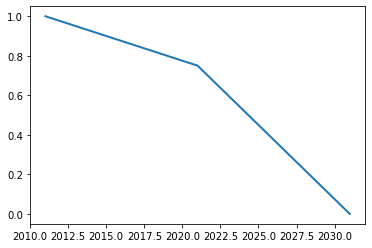

In [7]:
plt.plot(df1['Year'],df1['0-19'],linewidth=2.0)

In [8]:

X = df1['Year'].values.reshape(-1,1)
y = df1['0-19'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2041,2051]})

#from sklearn.model_selection import train_test_split

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[-1.2598591231023875, -3.0395092164833386]

In [12]:
dfTest['0-19'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True,sort=True)



In [14]:
df1

,0-19,Year
0,1.000000,2011
1,0.750000,2021
2,0.000000,2031
3,-1.259859,2041
4,-3.039509,2051


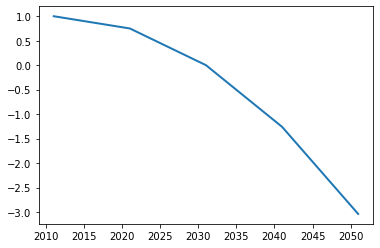

In [15]:
plt.plot(df1['Year'],df1['0-19'],linewidth=2.0)


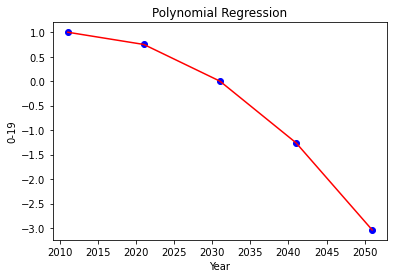

In [16]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['0-19'], color = 'blue') 
  
plt.plot(df1['Year'], df1['0-19'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('0-19') 
  
plt.show()

# WRT Unproportioned Scale

In [17]:
pred = []
for i in df1['0-19']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [18]:
pred

[15.0, 15.0, 13.0, 10.0, 6.0]

In [19]:
df1

,0-19,Year
0,1.000000,2011
1,0.750000,2021
2,0.000000,2031
3,-1.259859,2041
4,-3.039509,2051


In [20]:
df1['0-19'] = pred


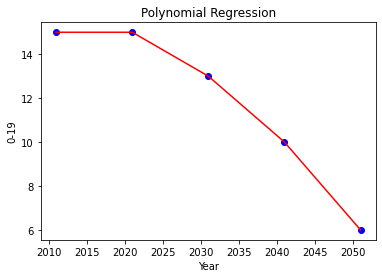

In [21]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['0-19'], color = 'blue') 
  
plt.plot(df1['Year'], df1['0-19'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('0-19') 
  
plt.show() 

In [22]:
scaler = MinMaxScaler()
df[['20-59']] = scaler.fit_transform(df[['20-59']])

In [23]:
df2 = df[['Year','20-59']]


In [24]:
df2

,Year,20-59
0,2011,0.0
1,2021,0.5
2,2031,1.0


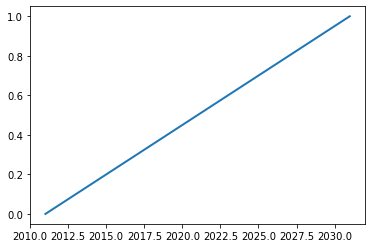

In [25]:
plt.plot(df2['Year'],df2['20-59'],linewidth=2.0)


In [26]:
X = df2['Year'].values.reshape(-1,1)
y = df2['20-59'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
dfTest = pd.DataFrame({'Year':[2041,2051]})

In [28]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [29]:
pred

[1.4999261865174773, 1.9997040191986812]

In [30]:
dfTest['20-59'] = pred

In [31]:
df2 = df2.append(dfTest,ignore_index=True)

In [32]:
df2

,Year,20-59
0,2011,0.000000
1,2021,0.500000
2,2031,1.000000
3,2041,1.499926
4,2051,1.999704


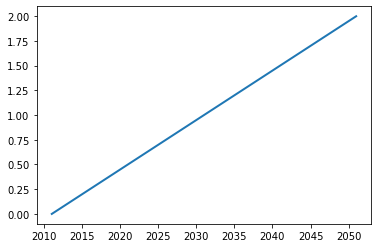

In [33]:
plt.plot(df2['Year'],df2['20-59'],linewidth=2.0)

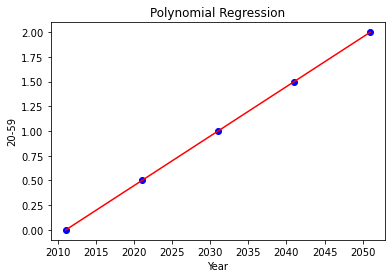

In [34]:
plt.scatter(df2['Year'], df2['20-59'], color = 'blue') 
  
plt.plot(df2['Year'], df2['20-59'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('20-59') 
  
plt.show()

WRT UNSCALED 20-59

In [35]:
pred = []
for i in df2['20-59']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [36]:
pred

[15.0, 20.0, 24.0, 28.0, 33.0]

In [37]:
df2['20-59'] = pred

In [38]:
df2

,Year,20-59
0,2011,15.0
1,2021,20.0
2,2031,24.0
3,2041,28.0
4,2051,33.0


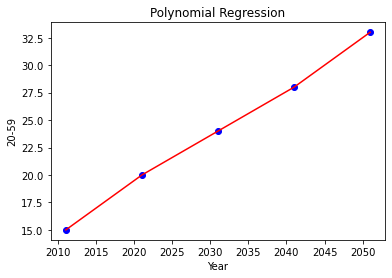

In [39]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['20-59'], color = 'blue') 
  
plt.plot(df2['Year'], df2['20-59'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('20-59') 
  
plt.show()

In [40]:
scaler = MinMaxScaler()
df[['Above 60']] = scaler.fit_transform(df[['Above 60']])

In [41]:
df3 = df[['Year','Above 60']]

In [42]:
df3

,Year,Above 60
0,2011,0.0
1,2021,0.4
2,2031,1.0


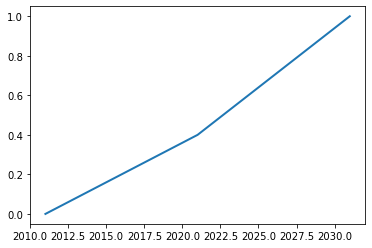

In [43]:
plt.plot(df3['Year'],df3['Above 60'],linewidth=2.0)

In [44]:
X = df3['Year'].values.reshape(-1,1)
y = df3['Above 60'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
dfTest = pd.DataFrame({'Year':[2041,2051]})

In [46]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [47]:
pred

[1.8038993611519345, 2.8156260981129435]

In [48]:
dfTest['Above 60'] = pred

In [49]:
df3 = df3.append(dfTest,ignore_index=True)

In [50]:
df3

,Year,Above 60
0,2011,0.000000
1,2021,0.400000
2,2031,1.000000
3,2041,1.803899
4,2051,2.815626


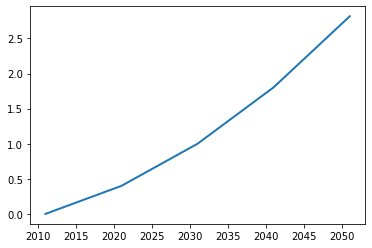

In [51]:
plt.plot(df3['Year'],df3['Above 60'],linewidth=2.0)

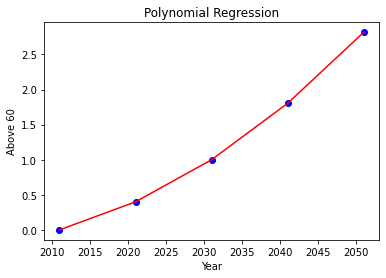

In [52]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Above 60'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Above 60'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Above 60') 
  
plt.show() 

# WRT Unscaled Above 60

In [53]:
pred = []
for i in df3['Above 60']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [54]:
pred

[2.0, 3.0, 4.0, 6.0, 8.0]

In [55]:
df3['Above 60'] = pred

In [56]:
df3

,Year,Above 60
0,2011,2.0
1,2021,3.0
2,2031,4.0
3,2041,6.0
4,2051,8.0


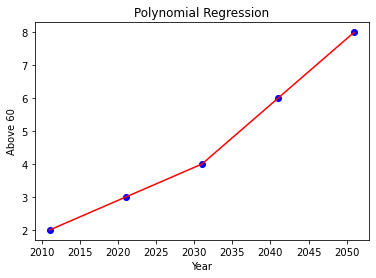

In [57]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Above 60'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Above 60'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Above 60') 
  
plt.show() 